<center> <font color=#3498DB><h2>EDA</h2></font>  <h2></h2> </center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
import db_conection

In [2]:
#leer db
query = "select * from candidates_raw"
dataframe_raw = pd.read_sql(sql=query, con = db_conection.conn())

In [3]:
dataframe_raw.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [4]:
# Descripción básica del dataframe
dataframe_raw.info()

# Estadísticas descriptivas
dataframe_raw.describe()

# Revisar valores únicos para cada columna
for column in dataframe_raw.columns:
    print(f"{column}: {dataframe_raw[column].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB
First Name: 3007 unique values
Last Name: 474 unique values
Email: 49833 unique values
Application Date: 1646 unique values
Country: 244 unique values
YOE: 31 unique values
Seniorit

In [5]:
# Verificar si hay valores nulos en el dataframe
print(dataframe_raw.isnull().sum())

# Verificar si hay filas duplicadas
print(f"Duplicated rows: {dataframe_raw.duplicated().sum()}")

First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64
Duplicated rows: 0


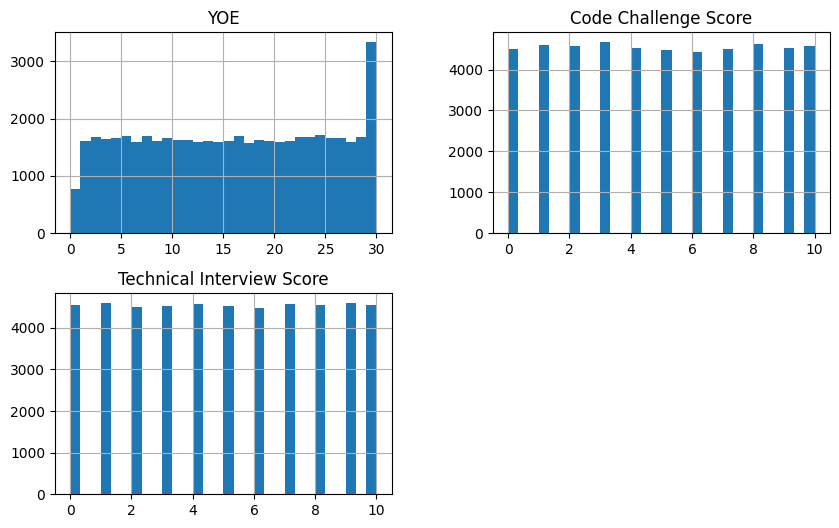

In [6]:
# Visualización de la Distribución de las Variables
dataframe_raw[['YOE', 'Code Challenge Score', 'Technical Interview Score']].hist(bins=30, figsize=(10, 6))
plt.show()

In [7]:
import numpy as np

# Crear la columna 'hired' basada en la condición de que ambas puntuaciones sean >= 7
dataframe_raw['hired'] = np.where(
    (dataframe_raw['Code Challenge Score'] >= 7) & (dataframe_raw['Technical Interview Score'] >= 7), 
    1, 
    0
)

# Ver las primeras filas del dataframe para verificar la nueva columna
print(dataframe_raw[['Code Challenge Score', 'Technical Interview Score', 'hired']].head())

   Code Challenge Score  Technical Interview Score  hired
0                     3                          3      0
1                     2                         10      0
2                    10                          9      1
3                     7                          1      0
4                     9                          7      1


In [8]:
#cargar los datos en postgres y leer de nuevo
dataframe_raw.to_sql("candidates_hired" ,con = db_conection.conn(), if_exists="replace", index=False) #load into postgres

1000

In [9]:
get_all_data_hired = f"SELECT * FROM candidates_hired" #The query to get the data for the pd dataframe
candidates_hired = pd.read_sql(get_all_data_hired,con = db_conection.conn())

In [10]:
candidates_hired

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1,0
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2,0
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1,0
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0,0


In [11]:
candidates_hired.hired.value_counts()

hired
0    43302
1     6698
Name: count, dtype: int64

<center> <font color=#3498DB><h2>VISUALIZACIONES</h2></font>  <h2>📊</h2> </center>

Hires by technology (pie chart)
Hires by year (horizontal bar chart)
Hires by seniority (bar chart)
Hires by country over years (USA, Brazil, Colombia and Ecuador only) (multiline chart)

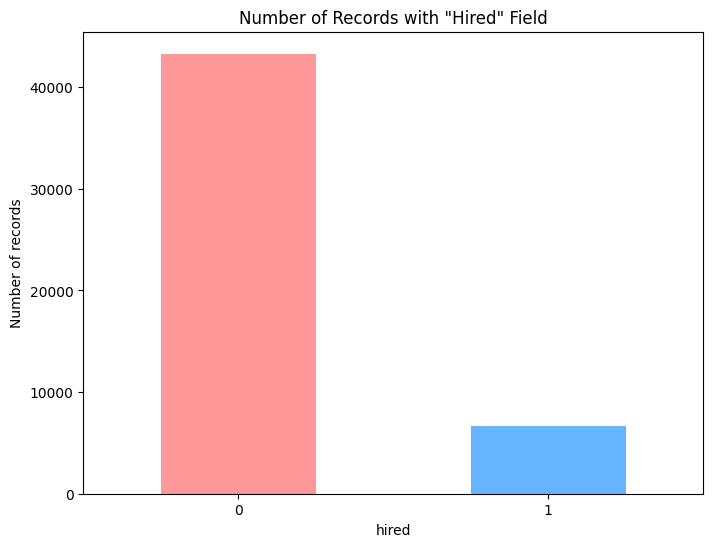

In [12]:
Total_Hired = candidates_hired['hired'].value_counts()

plt.figure(figsize=(8, 6))
Total_Hired.plot(kind='bar', color=['#FF9999', '#66B3FF'])
plt.title('Number of Records with "Hired" Field')
plt.xlabel('hired')
plt.ylabel('Number of records')
plt.xticks(rotation=0)
plt.show()

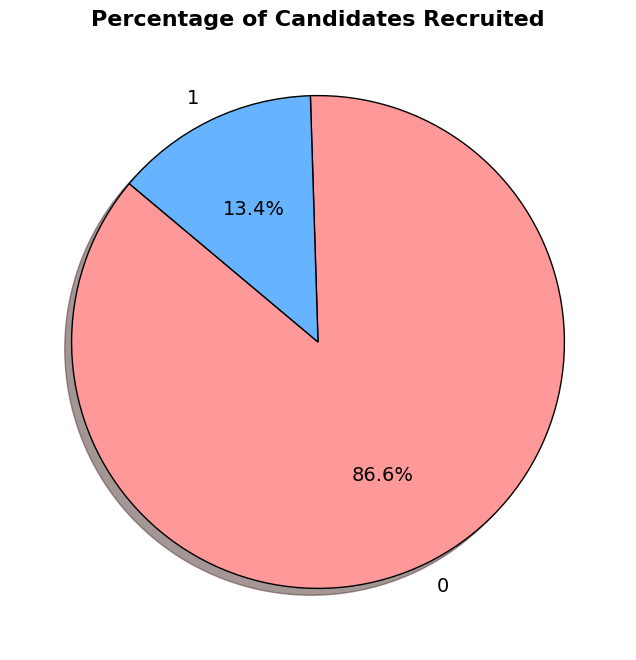

In [13]:
Number_of_hires = candidates_hired['hired'].value_counts()

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']

plt.figure(figsize=(8, 8))

# Improved pie chart with shadow and custom start angle
plt.pie(Number_of_hires, labels=Number_of_hires.index, autopct='%1.1f%%', 
        colors=colors, startangle=140, shadow=True, 
        textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black'})

plt.title('Percentage of Candidates Recruited', fontsize=16, fontweight='bold')

# Display the pie chart
plt.show()

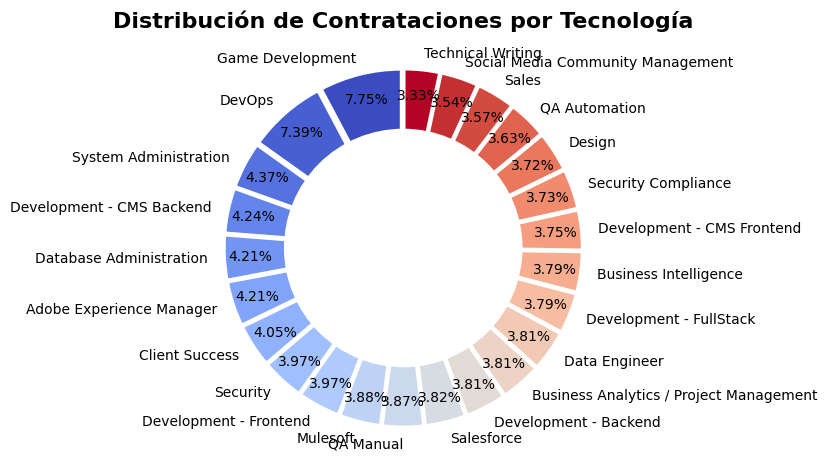

In [14]:
# Filtrar solo los candidatos contratados (hired = 1)
candidates_hired = dataframe_raw[dataframe_raw['hired'] == 1]

# Contar las contrataciones por tecnología
tech_counts = candidates_hired['Technology'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))

# Cambiar el colormap a "coolwarm" para mantener la armonía en los colores
colors = plt.cm.coolwarm(np.linspace(0, 1, len(tech_counts)))

# Explode para separar un poco las secciones (esto mejora la legibilidad)
explode = [0.05] * len(tech_counts)  # Separar todas las secciones ligeramente

# Crear el gráfico circular con etiquetas desplazadas hacia afuera
plt.pie(tech_counts, labels=tech_counts.index, autopct='%1.2f%%', startangle=90, 
        colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2}, 
        explode=explode, pctdistance=0.85, labeldistance=1.1)

# Añadir un círculo para crear el efecto de un gráfico tipo "donut"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Personalizar el título
plt.title("Distribución de Contrataciones por Tecnología", fontsize=16, fontweight='bold')

# Ajustar la presentación del gráfico
plt.tight_layout()
plt.show()


C:\Users\MAFE\AppData\Local\Temp\ipykernel_15900\1383831503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_hired["Year"] = hby.dt.year


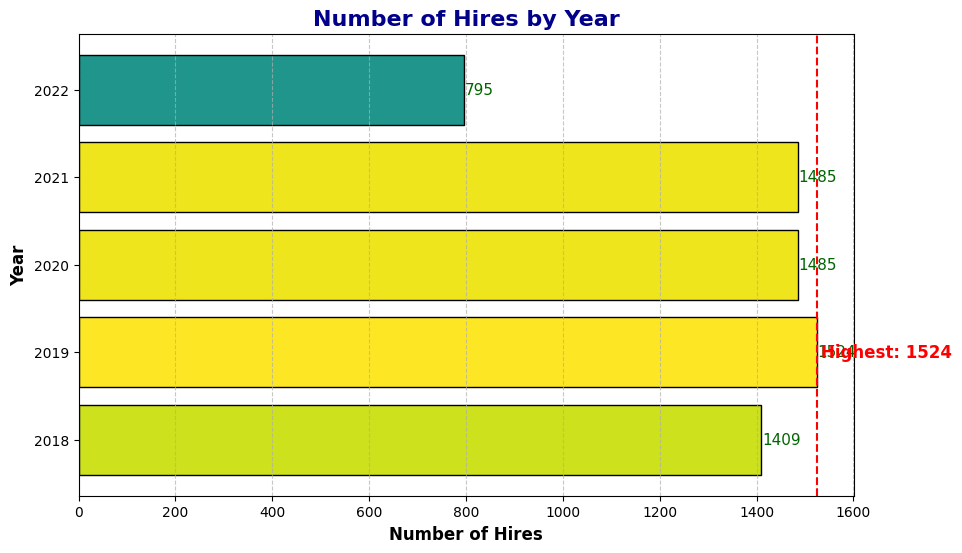

In [15]:
hby = pd.to_datetime(candidates_hired["Application Date"], format="%Y-%m-%d")
candidates_hired["Year"] = hby.dt.year
hires_by_year = candidates_hired.groupby("Year").size()
is_hire = candidates_hired[candidates_hired["hired"] == 1]
hires_by_year_hired = is_hire.groupby("Year").size()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Generate color gradient
colors = plt.cm.viridis(hires_by_year.values / hires_by_year.max())

# Plot horizontal bar chart with gradient color
bars = ax.barh(hires_by_year.index, hires_by_year.values, color=colors, edgecolor='black')

# Add gridlines for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Customizing labels and title
ax.set_ylabel("Year", fontsize=12, fontweight='bold')
ax.set_xlabel("Number of Hires", fontsize=12, fontweight='bold')
ax.set_title("Number of Hires by Year", fontsize=16, fontweight='bold', color='darkblue')

# Annotating the bars with hire numbers
for bar in bars:
    ax.text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center',
        fontsize=11,
        color='darkgreen'
    )

# Highlight the year with the maximum hires
max_hires_year = hires_by_year.idxmax()
max_hires = hires_by_year.max()
ax.axvline(max_hires, color='red', linestyle='--')
ax.text(
    max_hires + 10, 
    max_hires_year, 
    f'Highest: {max_hires}', 
    va='center', 
    ha='left', 
    fontsize=12, 
    fontweight='bold', 
    color='red'
)

# Display the plot
plt.show()

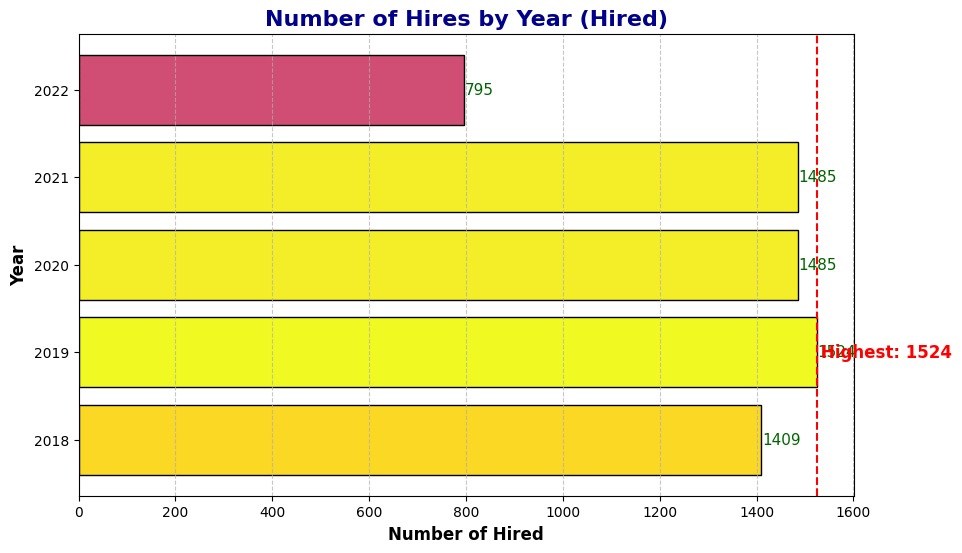

In [16]:
# Assuming `candidates_hired` DataFrame is already defined
is_hire = candidates_hired[candidates_hired["hired"] == 1]
hires_by_year_hired = is_hire.groupby("Year").size()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Generate color gradient using a different colormap
colors = plt.cm.plasma(hires_by_year_hired.values / hires_by_year_hired.max())

# Plot horizontal bar chart with gradient color
bars = ax.barh(hires_by_year_hired.index, hires_by_year_hired.values, color=colors, edgecolor='black')

# Add gridlines for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Customize labels and title
ax.set_ylabel("Year", fontsize=12, fontweight='bold')
ax.set_xlabel("Number of Hired", fontsize=12, fontweight='bold')
ax.set_title("Number of Hires by Year (Hired)", fontsize=16, fontweight='bold', color='darkblue')

# Annotating the bars with the number of hires
for bar in bars:
    ax.text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center',
        fontsize=11,
        color='darkgreen'
    )

# Highlight the year with the maximum hires
max_year_hired = hires_by_year_hired.idxmax()
max_hires_hired = hires_by_year_hired.max()
ax.axvline(max_hires_hired, color='red', linestyle='--')
ax.text(
    max_hires_hired + 10,
    max_year_hired,
    f'Highest: {max_hires_hired}',
    va='center',
    ha='left',
    fontsize=12,
    fontweight='bold',
    color='red'
)

# Display the plot
plt.show()

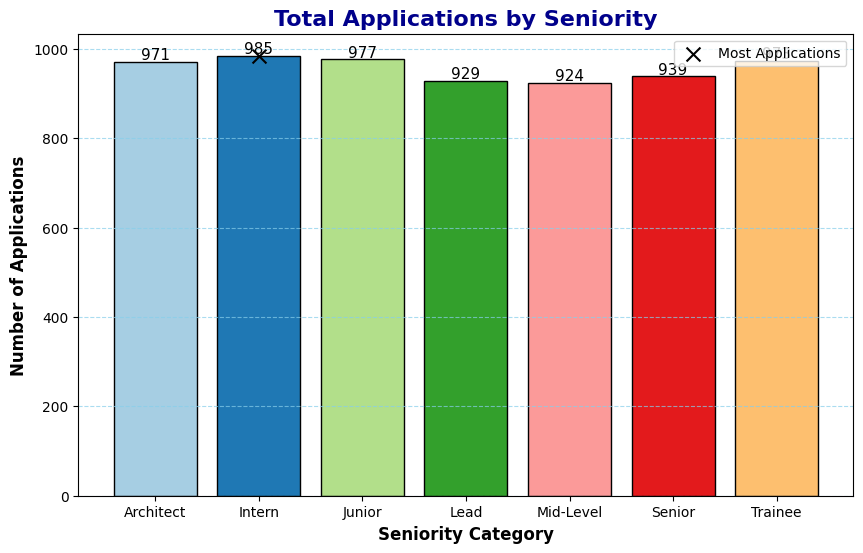

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `candidates_hired` DataFrame is already defined
hired_by_seniority = candidates_hired.groupby("Seniority").size()
hired_by_seniority_h = is_hire.groupby("Seniority").size()

# Plot for total hires by seniority
fig, ax = plt.subplots(figsize=(10, 6))

# Using a color palette for the bars
colors = plt.cm.Paired(range(len(hired_by_seniority)))

# Plotting the bar chart
bars = ax.bar(hired_by_seniority.index, hired_by_seniority.values, color=colors, edgecolor='black')

# Customizing the grid
ax.grid(True, axis="y", linestyle="--", color="skyblue", alpha=0.7)

# Adding title and labels
ax.set_title("Total Applications by Seniority", fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel("Seniority Category", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Applications", fontsize=12, fontweight='bold')

# Highlight the bar with the maximum applications
max_applications_idx = hired_by_seniority.idxmax()
max_applications_value = hired_by_seniority.max()
ax.scatter(max_applications_idx, max_applications_value, marker="x", color="black", s=100, label="Most Applications")

# Adding annotations to the bars
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        f'{int(bar.get_height())}',
        ha='center',
        fontsize=11,
        color='black'
    )

# Adding legend
ax.legend(loc="upper right")

# Show the plot
plt.show()

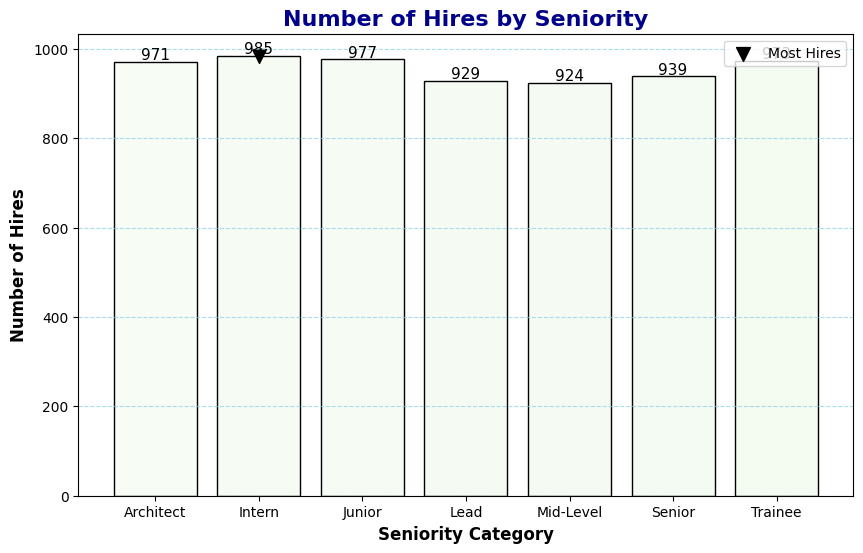

In [18]:
# Plot for hired by seniority
fig, ax = plt.subplots(figsize=(10, 6))

# Using a color gradient for the bars
colors = plt.cm.Greens(range(len(hired_by_seniority_h)))

# Plotting the bar chart
bars = ax.bar(hired_by_seniority_h.index, hired_by_seniority_h.values, color=colors, edgecolor='black')

# Customizing the grid
ax.grid(True, axis="y", linestyle="--", color="skyblue", alpha=0.7)

# Adding title and labels
ax.set_title("Number of Hires by Seniority", fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel("Seniority Category", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Hires", fontsize=12, fontweight='bold')

# Highlight the bar with the maximum hires
max_hires_idx = hired_by_seniority_h.idxmax()
max_hires_value = hired_by_seniority_h.max()
ax.scatter(max_hires_idx, max_hires_value, marker="v", color="black", s=100, label="Most Hires")

# Adding annotations to the bars
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        f'{int(bar.get_height())}',
        ha='center',
        fontsize=11,
        color='black'
    )

# Adding legend
ax.legend(loc="upper right")

# Show the plot
plt.show()

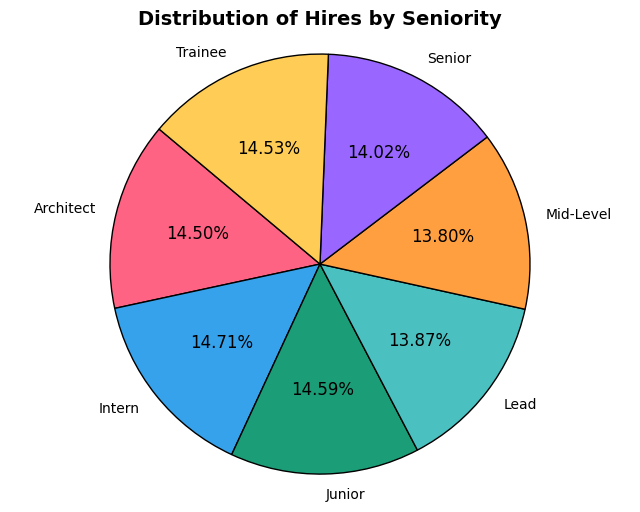

In [19]:
 #**Pie Chart: Distribution of Hires by Seniority**

# Create a new figure for the pie chart
fig2, ax2 = plt.subplots(figsize=(8, 6))

# Pie Chart Improvements
pie_colors = ["#ff6384", "#36a2eb", "#1b9e77", "#4bc0c0", "#ff9f40", "#9966ff", "#ffcd56"]
wedges, texts, autotexts = ax2.pie(
    hired_by_seniority_h, 
    labels=hired_by_seniority_h.index, 
    autopct=lambda p: '{:.2f}%'.format(p), 
    colors=pie_colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

# Customize pie chart appearance
ax2.axis("equal")
ax2.set_title("Distribution of Hires by Seniority", fontsize=14, fontweight='bold')

# Enhance autopct text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

# Display the pie chart
plt.show()

In [20]:
candidates_hired.Country.unique()

array(['Belarus', 'Myanmar', 'Italy', 'El Salvador', 'Dominica', 'Japan',
       'Panama', 'Yemen', 'Wallis and Futuna', 'Puerto Rico', 'Bulgaria',
       'Republic of Korea', 'Estonia', 'Nauru',
       'Antarctica (the territory South of 60 deg S)', 'Cayman Islands',
       'Seychelles', 'India', 'Austria', 'United Kingdom', 'Bhutan',
       'Togo', 'Ghana', 'Central African Republic', 'Micronesia',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Burkina Faso', 'Tonga', 'Saint Martin',
       "Lao People's Democratic Republic", 'Virgin Islands U.S.',
       'Turkmenistan', 'Timor-Leste', 'Belize', 'Guatemala', 'Tanzania',
       'Western Sahara', 'Kenya', 'Montenegro', 'Bolivia', 'Venezuela',
       'Syrian Arab Republic', 'Honduras', 'Sri Lanka', 'Qatar', 'Brazil',
       'Gibraltar', 'Sudan', 'Martinique', 'Colombia', 'Macedonia',
       'Thailand', 'Sierra Leone', 'Angola', 'Malawi', 'Nicaragua',
       'Isle of Man', 'Ecuador', 'Uzbekistan', 'Madagascar', 'Ca

In [21]:
countries_of_interest = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']#Create a list with the values to graph

hired_by_country = candidates_hired[candidates_hired.Country.isin(countries_of_interest)]#filter by these countries
hired_by_country_h = hired_by_country[hired_by_country.hired == 1]#Second filter with hired_people

In [22]:
hired_by_country.describe()
#identify the distribution of our data 

,YOE,Code Challenge Score,Technical Interview Score,hired,Year
count,103.000000,103.000000,103.000000,103.0,103.000000
mean,15.640777,8.339806,8.699029,1.0,2019.825243
std,8.262666,1.107491,1.170176,0.0,1.324188
min,1.000000,7.000000,7.000000,1.0,2018.000000
25%,10.500000,7.000000,8.000000,1.0,2019.000000
50%,15.000000,8.000000,9.000000,1.0,2020.000000
75%,22.000000,9.000000,10.000000,1.0,2021.000000
max,30.000000,10.000000,10.000000,1.0,2022.000000


In [23]:
hired_by_country_h.describe()

,YOE,Code Challenge Score,Technical Interview Score,hired,Year
count,103.000000,103.000000,103.000000,103.0,103.000000
mean,15.640777,8.339806,8.699029,1.0,2019.825243
std,8.262666,1.107491,1.170176,0.0,1.324188
min,1.000000,7.000000,7.000000,1.0,2018.000000
25%,10.500000,7.000000,8.000000,1.0,2019.000000
50%,15.000000,8.000000,9.000000,1.0,2020.000000
75%,22.000000,9.000000,10.000000,1.0,2021.000000
max,30.000000,10.000000,10.000000,1.0,2022.000000


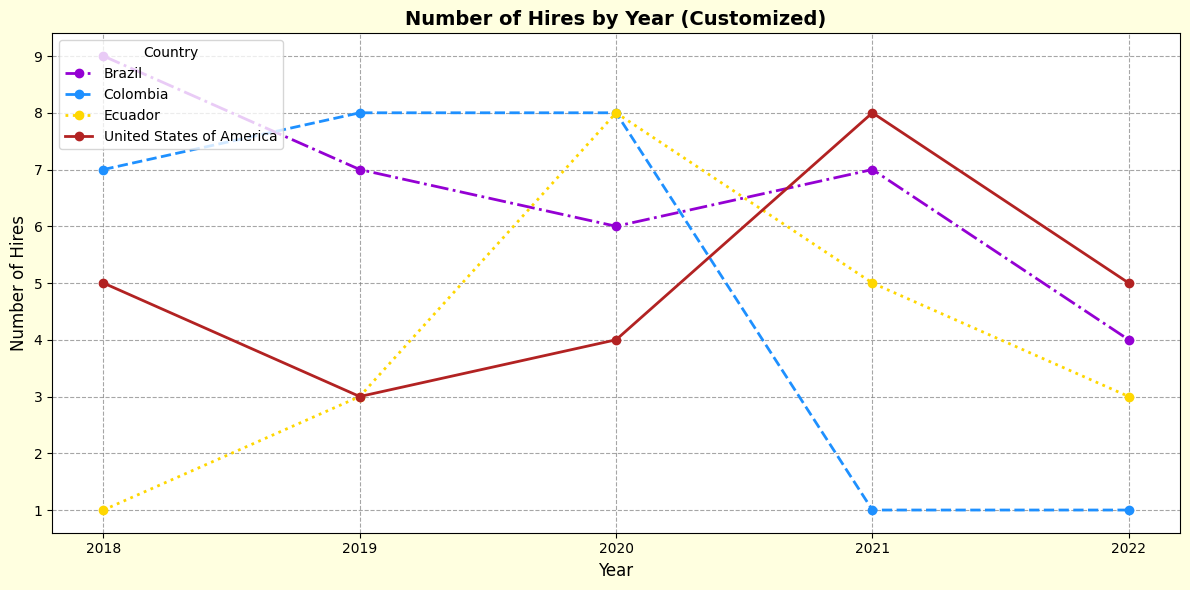

In [24]:
# Filtrar los países de interés
countries_of_interest = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
hired_by_country = candidates_hired[candidates_hired['Country'].isin(countries_of_interest)]
hired_by_country_h = hired_by_country[hired_by_country['hired'] == 1]

# Agrupar por año y país, y contar las contrataciones
grouped = hired_by_country_h.groupby(['Year', 'Country']).size().reset_index(name='Count')

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 6))

# Nuevos colores personalizados
colors = {"United States of America": "firebrick", "Brazil": "darkviolet", "Colombia": "dodgerblue", "Ecuador": "gold"}
line_styles = {"Ecuador": ":", "Brazil": "-.", "Colombia": "--", "United States of America": "-"}

for country in grouped['Country'].unique():
    country_data = grouped[grouped['Country'] == country]
    ax.plot(country_data['Year'], country_data['Count'], label=country, color=colors[country], linestyle=line_styles.get(country, '-'), marker='o', linewidth=2)

# Personalizar el gráfico
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel("Number of Hires", fontsize=12)
ax.set_title('Number of Hires by Year (Customized)', fontsize=14, fontweight='bold')
ax.legend(title="Country", loc='upper left', fontsize=10)
ax.set_xticks(grouped['Year'].unique())
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)
fig.set_facecolor("lightyellow")

plt.tight_layout()
plt.show()

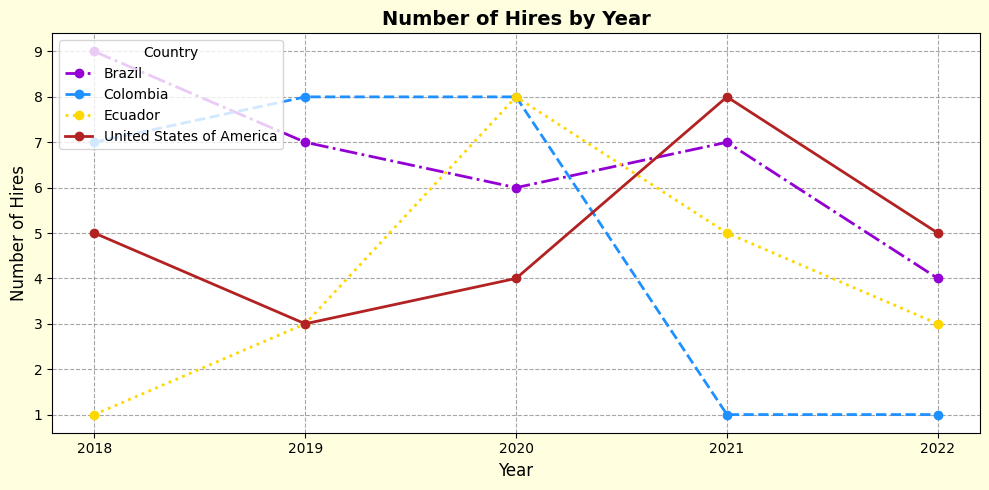

In [25]:
# Filtrar los países de interés y agrupar los datos por año y país, contando las contrataciones
grouped = hired_by_country.groupby(['Year', 'Country']).count().reset_index()

# Definir colores personalizados
colors = {"United States of America": "firebrick", "Brazil": "darkviolet", "Colombia": "dodgerblue", "Ecuador": "gold"}
line_styles = {"Ecuador": ":", "Brazil": "-.", "Colombia": "--", "United States of America": "-"}

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 5))

for country in grouped['Country'].unique():
    country_data = grouped[grouped['Country'] == country]
    ax.plot(country_data['Year'], country_data['hired'], 
            label=country, 
            color=colors.get(country, 'black'),  # Usar el color definido, o negro si el país no está en el diccionario
            linestyle=line_styles.get(country, '-'), 
            marker='o', linewidth=2)

# Personalizar el gráfico
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel("Number of Hires", fontsize=12)
ax.set_title('Number of Hires by Year', fontsize=14, fontweight='bold')
ax.legend(title="Country", loc='upper left', fontsize=10)
ax.set_xticks(grouped['Year'].unique())
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)
fig.set_facecolor("lightyellow")

plt.tight_layout()
plt.show()
